In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np


In [4]:
import warnings 

In [5]:
import seaborn as sns
from random import randint
#rand int returns a random integer between the higher and lower limit passed as parameters

In [6]:
cdata=pd.read_csv('Imports and Exports.csv')
cdata

,Country,Exporting,Importing,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
...,...,...,...,...,...,...,...
5989,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5990,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5991,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021
5992,ZIMBABWE,200.49,7.77,208.27,192.72,2021,2022


In [7]:
# shape of data
cdata.shape

(5994, 7)

In [8]:
# Percentage of missing values round by two digit after decimal. Reason behind to check whether it can be droped.
round(cdata.isnull().mean()*100,2)

Country                  0.00
Exporting                0.13
Importing                9.21
Total Trade              9.76
Trade Balance            9.78
Financial Year(start)    0.00
Financial Year(end)      0.00
dtype: float64

In [9]:
# Drop null
cdata = cdata.dropna()
cdata.head()

,Country,Exporting,Importing,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [10]:
# Data types
cdata.dtypes

Country                  object
Exporting                object
Importing                object
Total Trade              object
Trade Balance            object
Financial Year(start)     int64
Financial Year(end)      object
dtype: object

In [17]:
# Remove all ',' 
cdata['Exporting'] = cdata['Exporting'].str.replace(',','')
cdata['Importing'] = cdata['Importing'].str.replace(',','')
cdata['Total Trade'] = cdata['Total Trade'].str.replace(',','')
cdata['Trade Balance'] = cdata['Trade Balance'].str.replace(',','')

AttributeError: Can only use .str accessor with string values!

In [12]:
# changed data type for calaculation
cdata['Exporting'] = cdata['Exporting'].astype('float')
cdata['Importing'] = cdata['Importing'].astype('float')
cdata['Total Trade'] = cdata['Total Trade'].astype('float')
cdata['Trade Balance'] = cdata['Trade Balance'].astype('float')
cdata.dtypes

C:\Users\Likhitha Kancharla\AppData\Local\Temp\ipykernel_4660\3342947130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['Exporting'] = cdata['Exporting'].astype('float')
C:\Users\Likhitha Kancharla\AppData\Local\Temp\ipykernel_4660\3342947130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['Importing'] = cdata['Importing'].astype('float')
C:\Users\Likhitha Kancharla\AppData\Local\Temp\ipykernel_4660\3342947130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Country                   object
Exporting                float64
Importing                float64
Total Trade              float64
Trade Balance            float64
Financial Year(start)      int64
Financial Year(end)       object
dtype: object

In [13]:
ctotal = cdata.groupby(['Country']).agg('sum', numeric_only=True)
#x = [randint(1997, 2022) for p in range(0, 243)]

In [14]:
top_ten = cdata.nlargest(10, ['Exporting'])

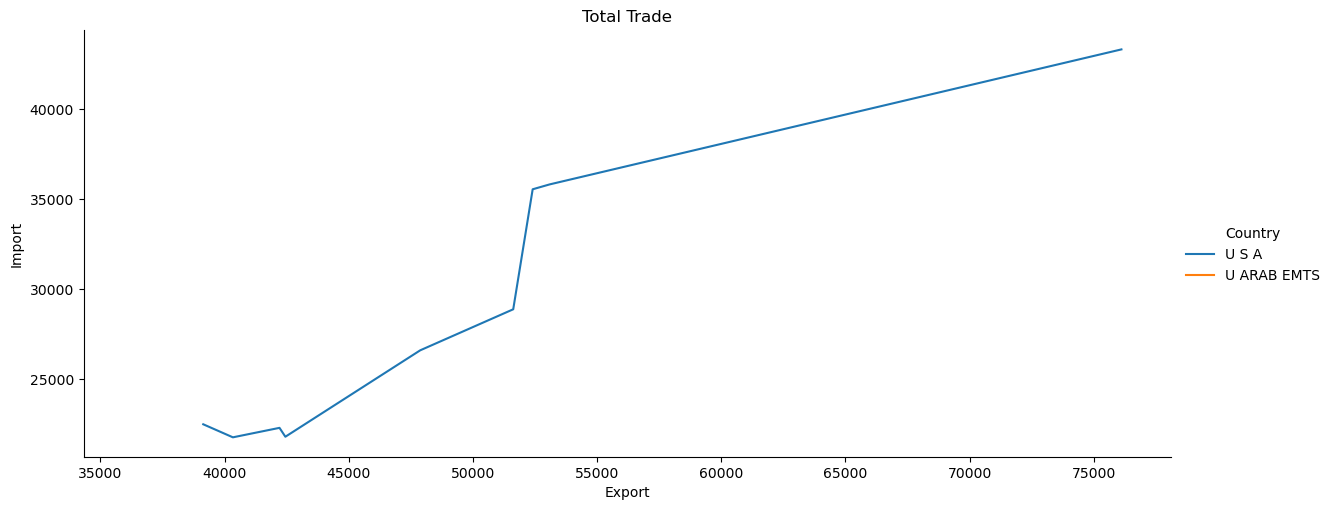

In [16]:
sns.relplot(
    data=top_ten, 
    x="Exporting", y="Importing", hue="Country",
    height=5, aspect=2.4, 
    kind="line"
).set(
    title="Total Trade", 
    ylabel="Import",
    xlabel="Export"
)

In [27]:
top_ten = cdata.nlargest(10, ['Importing'])

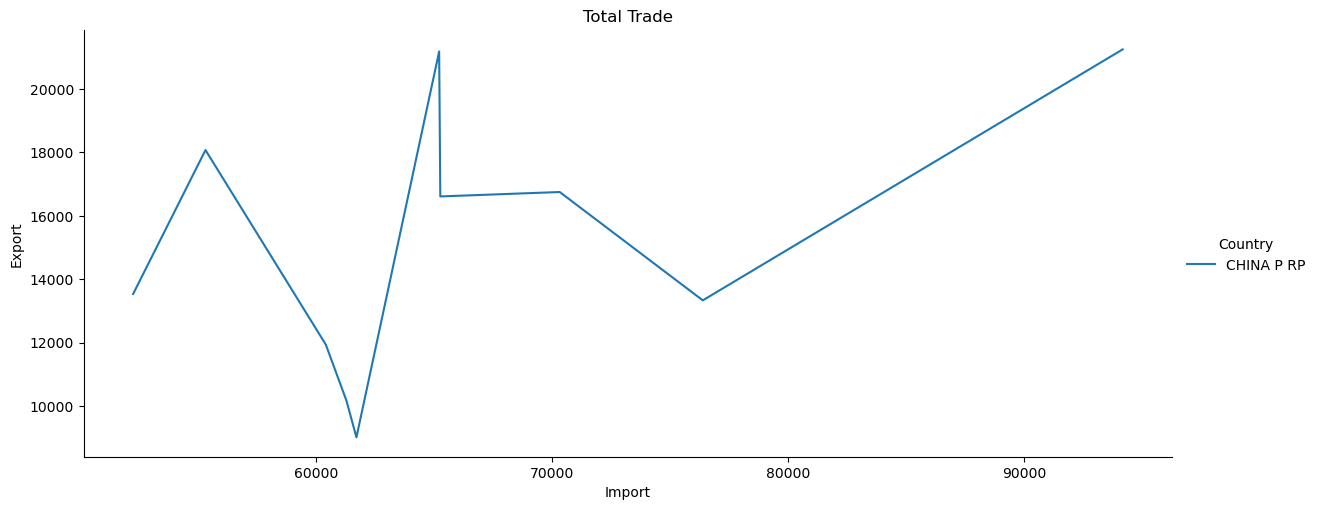

In [28]:
sns.relplot(
    data=top_ten, 
    x="Importing", y="Exporting", hue="Country",
    height=5, aspect=2.4, 
    kind="line"
).set(
    title="Total Trade", 
    ylabel="Export",
    xlabel="Import"
)

In [29]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Text(0, 0.5, 'Exports')

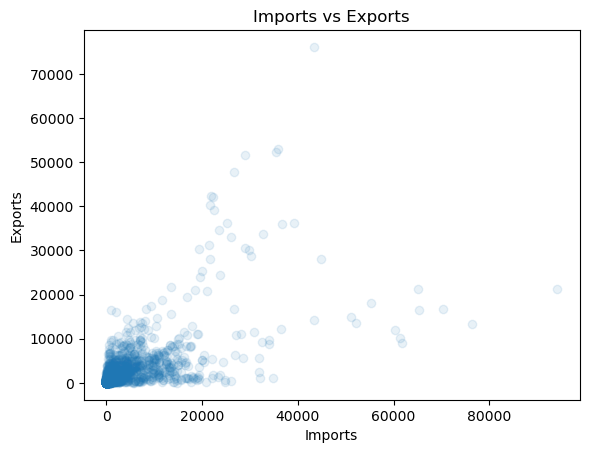

In [34]:
plt.scatter(cdata.Importing,cdata.Exporting,alpha=0.1)#to check density of plots
plt.title("Imports vs Exports")
plt.xlabel("Imports")
plt.ylabel("Exports")

<Axes: xlabel='Total Trade', ylabel='Trade Balance'>

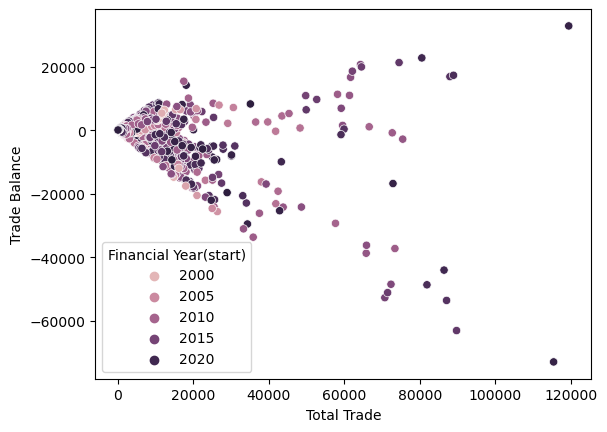

In [40]:
sns.scatterplot(x="Total Trade",y="Trade Balance",hue="Financial Year(start)",data=cdata)

<Axes: xlabel='Total Trade', ylabel='Trade Balance'>

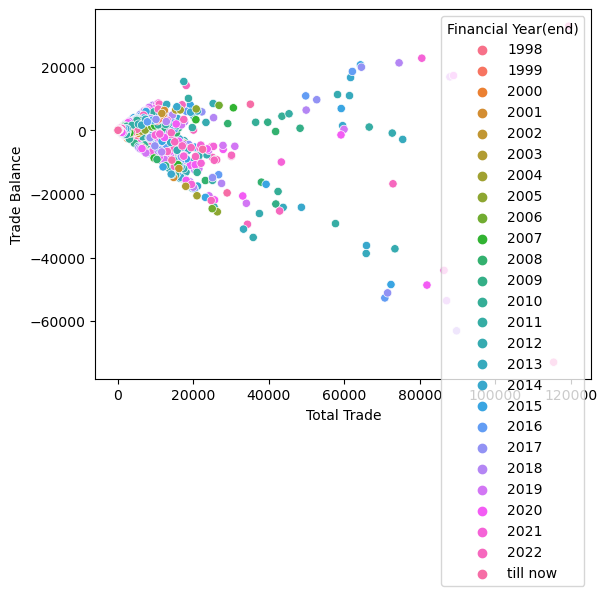

In [41]:
sns.scatterplot(x="Total Trade",y="Trade Balance",hue="Financial Year(end)",data=cdata)

<Axes: xlabel='Importing', ylabel='Exporting'>

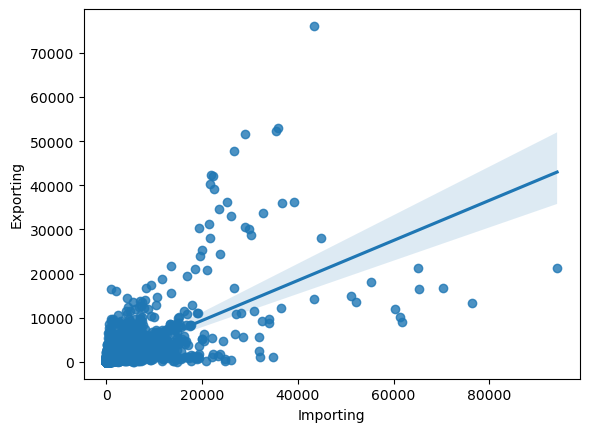

In [42]:
#regression plot
sns.regplot(x="Importing",y="Exporting",data=cdata)

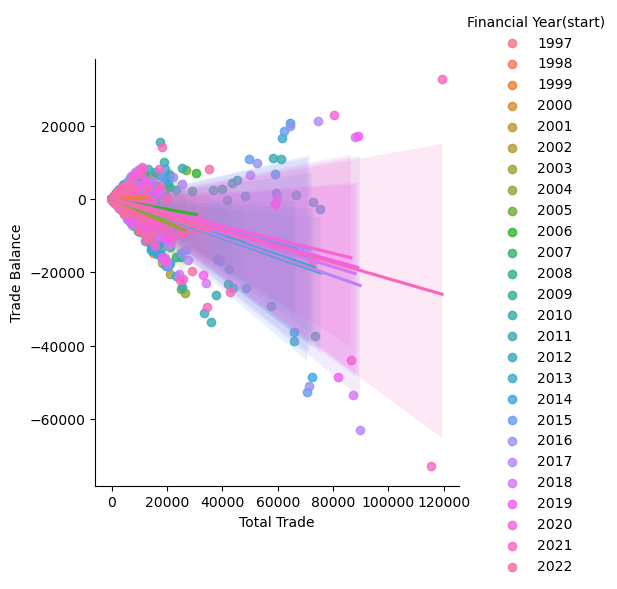

In [45]:
#lmplot
sns.lmplot(x="Total Trade",y="Trade Balance",hue="Financial Year(start)",data=cdata)

In [121]:
#Barchart for country
by_cnt=cdata.Country.value_counts()

In [122]:
by_cnt

AFGHANISTAN           26
LITHUANIA             26
MACEDONIA             26
MADAGASCAR            26
MALAWI                26
                      ..
CHANNEL IS             4
Petroleum Products     3
PACIFIC IS             1
CANARY IS              1
GUERNSEY               1
Name: Country, Length: 243, dtype: int64

<Axes: >

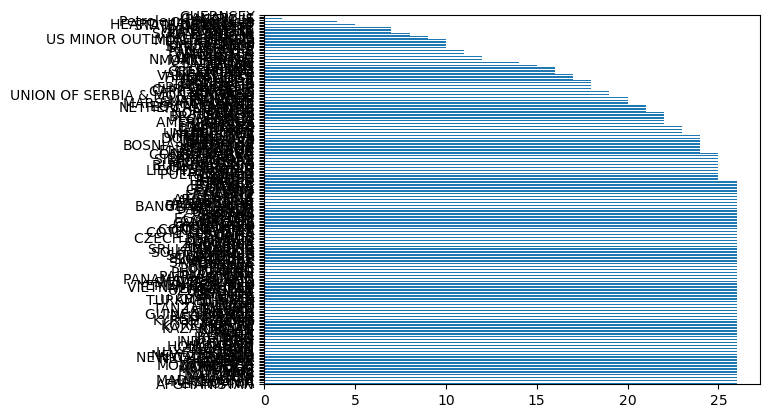

In [50]:
by_cnt.plot(kind="barh")

In [123]:
by_cnt=cdata.Country.value_counts()
top_10_cnt=by_cnt[:10]
top_10_cnt

AFGHANISTAN    26
LITHUANIA      26
MACEDONIA      26
MADAGASCAR     26
MALAWI         26
MALAYSIA       26
MALDIVES       26
MALI           26
MALTA          26
MAURITIUS      26
Name: Country, dtype: int64

<Axes: >

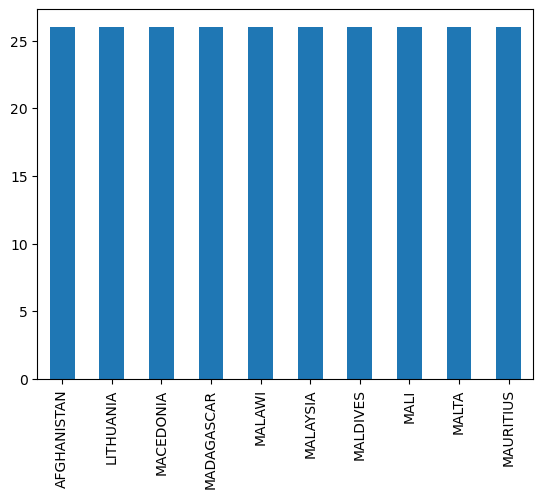

In [124]:
top_10_cnt.plot(kind='bar')

<Axes: ylabel='Country'>

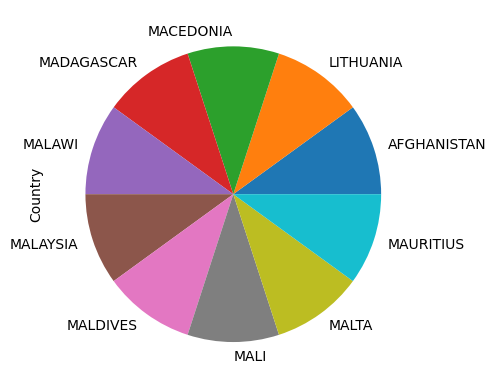

In [125]:
top_10_cnt.plot(kind='pie')

In [127]:
by_cnt=cdata.Country.value_counts()
top_10_cnt=by_cnt[180:200]
top_10_cnt

ANTIGUA                         21
BELIZE                          21
NETHERLANDANTIL                 21
EQUTL GUINEA                    21
RWANDA                          20
MARSHALL ISLAND                 20
GUADELOUPE                      20
MARTINIQUE                      20
MONACO                          20
ANDORRA                         19
UNION OF SERBIA & MONTENEGRO    19
ERITREA                         19
CAYMAN IS                       19
CAPE VERDE IS                   18
CHRISTMAS IS.                   18
FR POLYNESIA                    18
ST HELENA                       18
TOKELAU IS                      18
ST LUCIA                        18
BERMUDA                         18
Name: Country, dtype: int64

<Axes: >

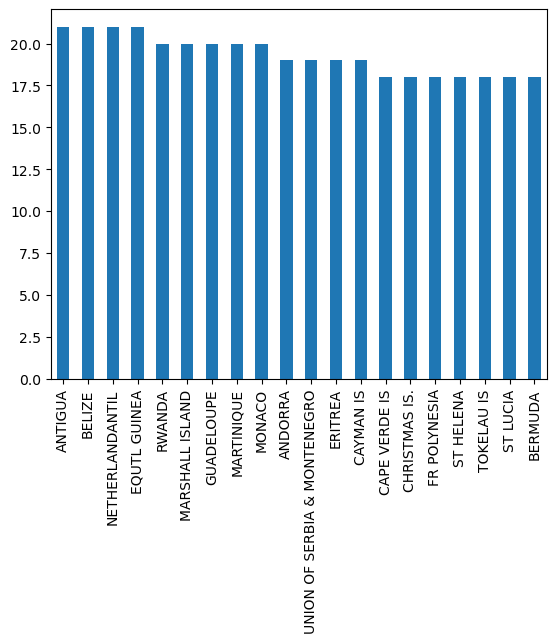

In [128]:
top_10_cnt.plot(kind='bar')

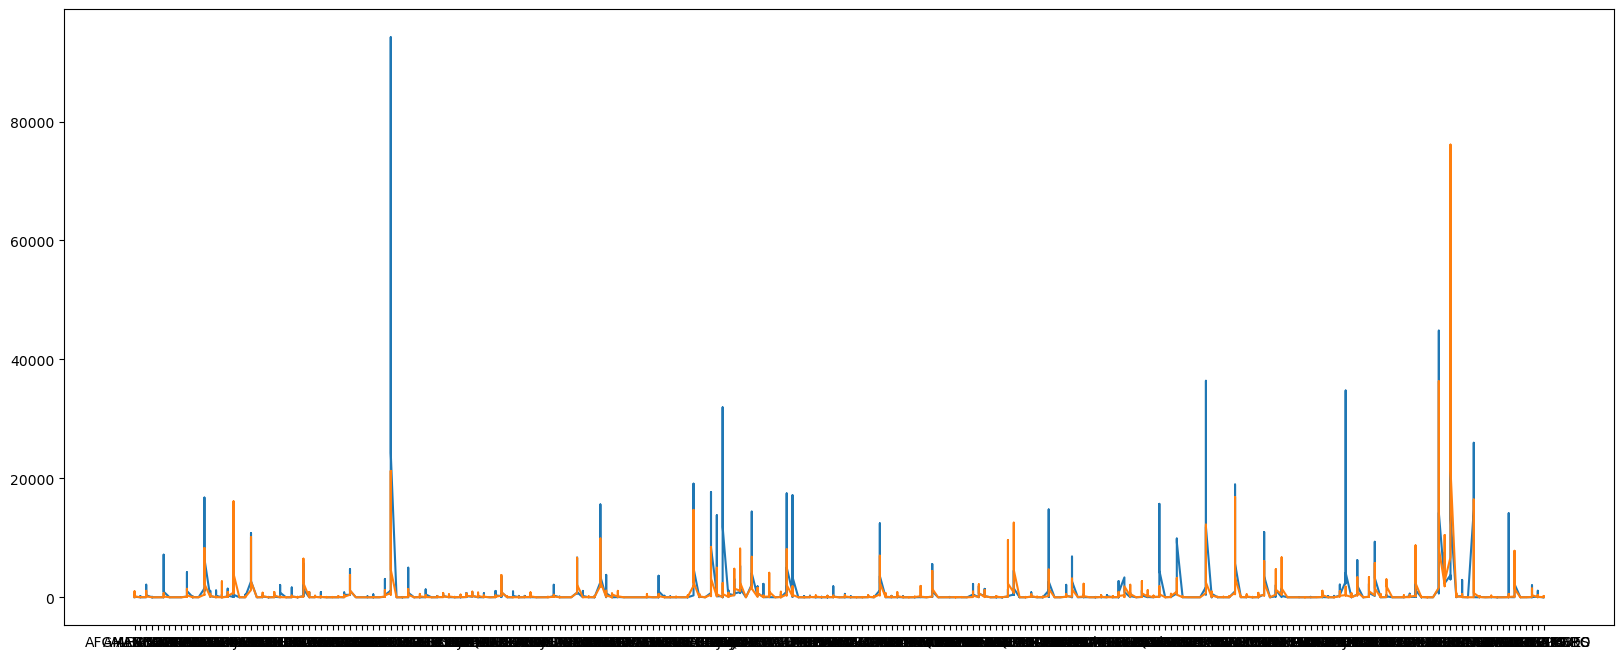

In [129]:
plt.figure(figsize=(20,8))
plt.plot(cdata.Country,cdata.Importing)
plt.plot(cdata.Country,cdata.Exporting)